Epoch 1/15
157/157 [==============================] - 25s 140ms/step - loss: 34.7903 - accuracy: 0.0000e+00 - val_loss: 35.1213 - val_accuracy: 0.0000e+00
Epoch 2/15
157/157 [==============================] - 16s 103ms/step - loss: 33.9122 - accuracy: 0.0000e+00 - val_loss: 34.0065 - val_accuracy: 0.0000e+00
Epoch 3/15
157/157 [==============================] - 17s 107ms/step - loss: 30.7628 - accuracy: 0.0000e+00 - val_loss: 31.0396 - val_accuracy: 0.0000e+00
Epoch 4/15
157/157 [==============================] - 19s 118ms/step - loss: 29.5277 - accuracy: 0.0000e+00 - val_loss: 29.8237 - val_accuracy: 0.0000e+00
Epoch 5/15
157/157 [==============================] - 17s 106ms/step - loss: 29.5114 - accuracy: 0.0000e+00 - val_loss: 29.5201 - val_accuracy: 0.0000e+00
Epoch 6/15
157/157 [==============================] - 17s 107ms/step - loss: 29.5475 - accuracy: 0.0000e+00 - val_loss: 29.8850 - val_accuracy: 0.0000e+00
Epoch 7/15
157/157 [==============================] - 18s 111ms/step -

INFO:tensorflow:Assets written to: saved_model/run2/assets


INFO:tensorflow:Assets written to: saved_model/run2/assets


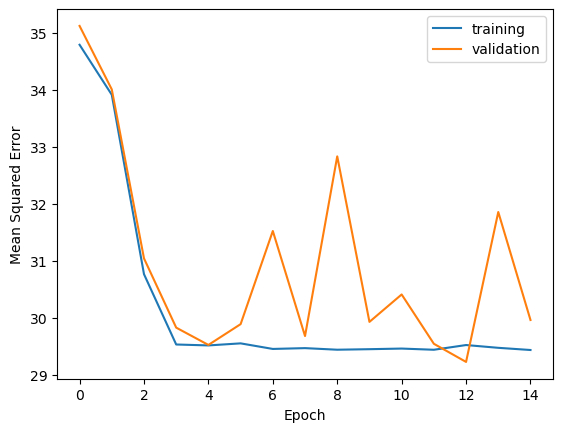

In [3]:
import get_data
from model import MyLSTMModel
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import os

config = "run2"

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = tf.keras.losses.MeanSquaredError()
epochs = 15
batch_size = 64
sequence = 6
lstm_units = 15

# get and prepare data and model
(training_data, val_data ) , ds_info = get_data.load_data(False) # True
#training_data = training_data.take(2000) # 
training_data = get_data.data_preprocess(training_data, batch_size = batch_size,sequence = sequence)
val_data = get_data.data_preprocess(val_data, batch_size = batch_size, sequence = sequence)

model = MyLSTMModel(total_input_shape = (batch_size, sequence, 28,28,1), lstm_units = lstm_units, output_units = 1)

# compile the model (here, adding a loss function and an optimizer)
model.compile(optimizer = optimizer, loss=loss)

logging_callback = tf.keras.callbacks.TensorBoard(log_dir=f"./logs/{config}")

history = model.fit(training_data, validation_data = val_data, epochs=epochs, batch_size=batch_size, callbacks=[logging_callback])
os.makedirs(f"Plots/", exist_ok = True)

model.save(f"saved_model/{config}")

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(labels=["training","validation"])
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.savefig(f"Plots/{config}.png")
plt.show()

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir="logs/{config}"